In [1]:
"""!pip install featuretools==1.7.0
!pip install joblib==1.0.1
!pip install matplotlib==3.3.4
!pip install numpy==1.20.1
!pip install pandas==1.3.5
!pip install scikit_learn==0.24.1
!pip install scipy==1.6.2
!pip install seaborn==0.11.1
!pip install xgboost==1.5.1"""

'!pip install featuretools==1.7.0\n!pip install joblib==1.0.1\n!pip install matplotlib==3.3.4\n!pip install numpy==1.20.1\n!pip install pandas==1.3.5\n!pip install scikit_learn==0.24.1\n!pip install scipy==1.6.2\n!pip install seaborn==0.11.1\n!pip install xgboost==1.5.1'

In [2]:
#Importing Necessary Libraries
#Matplot and seaborn for making graphs

import featuretools as ft

import numpy as np
import pandas as pd

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
# ! pip freeze > requirements.txt

In [4]:
 #Imorting the datasets
train =pd.read_csv("train_kOBLwZA.csv")
test=pd.read_csv("test_t02dQwI.csv")

print(train.shape,test.shape)

(8523, 12) (5681, 11)


In [5]:
def concat(X,Y):
    df= pd.concat([X,Y],ignore_index=True)
    return df

In [6]:
df=concat(train,test)
print(df.shape)

(14204, 12)


In [7]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
df.isnull().sum()  
#Checks number of null values for all the variables
#Item_Weight has 2439 null values 
#Outlet Size has 4016 null values

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [10]:
df.apply(lambda x: len(x.unique()))
#Checks the number of unique entries correspnding to each variable

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [11]:
#defining a function:
#frequency of unique entries in each columns with their names

def frequency_each_item(X,Y):
    for i in Y:
        print("frequency of each category for",i)
        print(X[i].value_counts())
        print("-"*60)

In [13]:
#frequency of unique entries in each columns with their names
category=['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size','Outlet_Type']
frequency_each_item(df,category)

frequency of each category for Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
------------------------------------------------------------
frequency of each category for Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
------------------------------------------------------------
frequency of each category for Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
------------------------

In [14]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


## Sanity Check

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


### Fixing Inconsistencies in "Item_Fat_Content"

In [17]:
# Correcting the mis-written datas
df['Item_Fat_Content'].replace(to_replace =['low fat','reg','LF'], 
                 value =['Low Fat','Regular','Low Fat'],inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

### Handling Missing Value for "Outlet_Size"

In [19]:
mode_Outlet_Size= df.groupby(['Outlet_Type'])['Outlet_Size'].agg(pd.Series.mode)
print(mode_Outlet_Size)
bool2=df['Outlet_Size'].isnull()
df['Outlet_Size'][bool2]=df['Outlet_Type'][bool2].apply(lambda x : mode_Outlet_Size.loc[x]).values
sum(df['Outlet_Size'].isnull())

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object


0

### Handling Missing Value for "Item_Weight"

In [20]:
avg_item_weight=df.groupby('Item_Identifier')['Item_Weight'].agg(np.mean)
print(avg_item_weight)
bool_value= df['Item_Weight'].isnull()
df['Item_Weight'][bool_value]=df['Item_Identifier'][bool_value].apply(lambda x :avg_item_weight.loc[x]).values
sum(df['Item_Weight'].isnull())

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64


0

In [22]:
df.sample(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
11187,FDT22,10.395,Low Fat,0.112004,Snack Foods,58.0220,OUT013,1987,High,Tier 3,Supermarket Type1,NaN
4752,FDQ51,16.000,Regular,0.000000,Meat,48.1718,OUT017,2007,Small,Tier 2,Supermarket Type1,756.3488
8088,FDY15,18.250,Regular,0.171524,Dairy,155.8630,OUT018,2009,Medium,Tier 3,Supermarket Type2,2346.9450
9373,FDQ21,21.250,Low Fat,0.000000,Snack Foods,123.1756,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
8418,DRJ25,14.600,Low Fat,0.151181,Soft Drinks,47.5692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2664,FDW24,6.800,Low Fat,0.037490,Baking Goods,48.6034,OUT035,2004,Small,Tier 2,Supermarket Type1,291.6204
10628,FDF26,6.825,Regular,0.046635,Canned,153.5998,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
8500,NCQ42,20.350,Low Fat,0.000000,Household,125.1678,OUT017,2007,Small,Tier 2,Supermarket Type1,1907.5170


In [23]:
#Reducing food category to only 3 types with the help of the first 2 alphabets of the Item_Identifier column

df['Item_Type_combined']=df['Item_Identifier'].apply(lambda x : x[0:2])
df['Item_Type_combined'].replace(to_replace =['FD','DR','NC'], 
                 value =['Food','Drinks','Non_consumable'],inplace=True)
 #dropping the redundant column
df=df.drop(columns=['Item_Type'])     
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_combined
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.000000,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non_consumable


In [24]:
#Calculating number of Item_fat_contents that are also non_consumable

bool3=df['Item_Type_combined']=='Non_consumable'

df['Item_Fat_Content'][bool3]='Non_edible'
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non_edible    2686
Name: Item_Fat_Content, dtype: int64

In [25]:
#Using feature Engineering and adding new column
df['years_old']=2013-df['Outlet_Establishment_Year']
df=df.drop(columns=['Outlet_Establishment_Year'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_combined,years_old
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.000000,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non_edible,0.000000,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Non_consumable,26


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       14204 non-null  object 
 1   Item_Weight           14204 non-null  float64
 2   Item_Fat_Content      14204 non-null  object 
 3   Item_Visibility       14204 non-null  float64
 4   Item_MRP              14204 non-null  float64
 5   Outlet_Identifier     14204 non-null  object 
 6   Outlet_Size           14204 non-null  object 
 7   Outlet_Location_Type  14204 non-null  object 
 8   Outlet_Type           14204 non-null  object 
 9   Item_Outlet_Sales     8523 non-null   float64
 10  Item_Type_combined    14204 non-null  object 
 11  years_old             14204 non-null  int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [27]:
# Converting all the zero values to mean in the visibility column
Item_Visibility_mean=df.groupby('Item_Identifier' )['Item_Visibility'].mean()
bool4=df['Item_Visibility']==0
df['Item_Visibility'][bool4]=df['Item_Identifier'][bool4].apply(lambda x:Item_Visibility_mean.loc[x]).values
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_combined,years_old
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.017834,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non_edible,0.009780,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Non_consumable,26


In [28]:
#Checks for correation between different numerical columns
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,years_old
Item_Weight,1.000000,-0.022028,0.035751,0.013261,-0.000247
Item_Visibility,-0.022028,1.000000,-0.007550,-0.128453,0.084481
Item_MRP,0.035751,-0.007550,1.000000,0.567574,-0.000141
Item_Outlet_Sales,0.013261,-0.128453,0.567574,1.000000,0.049135
years_old,-0.000247,0.084481,-0.000141,0.049135,1.000000


# Identifying outliers and fixing them

In [29]:
df.describe()            

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,years_old
count,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000
mean,12.793380,0.069710,141.004977,2181.288914,15.169319
std,4.651716,0.049728,62.086938,1706.499616,8.371664
min,4.555000,0.003575,31.290000,33.290000,4.000000
25%,8.710000,0.031145,94.012000,834.247400,9.000000
50%,12.600000,0.057194,142.247000,1794.331000,14.000000
75%,16.750000,0.096930,185.855600,3101.296400,26.000000
max,21.350000,0.328391,266.888400,13086.964800,28.000000


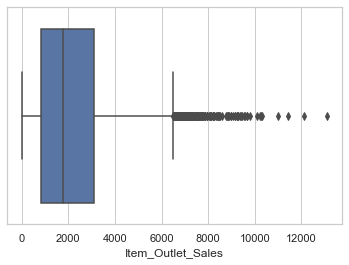

In [30]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Item_Outlet_Sales"])

In [31]:
#As we know only Item_Outlet_Sales have outliers we can fix them but fixing them will increase our RMSE score 
#to a large extent

# Plotting Graphs for more Analysis

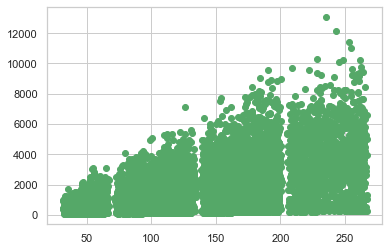

In [32]:
#value of sales increases for the increase in MRP of the item
plt.scatter(df.Item_MRP,df.Item_Outlet_Sales,c='g')
plt.show()

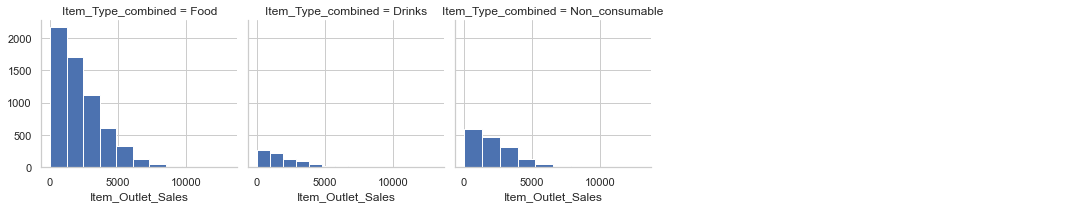

In [33]:
sns.FacetGrid(df, col='Item_Type_combined', size=3, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();
# Maximum contribution to outlet sales is from Items that are food type and least is from drinks

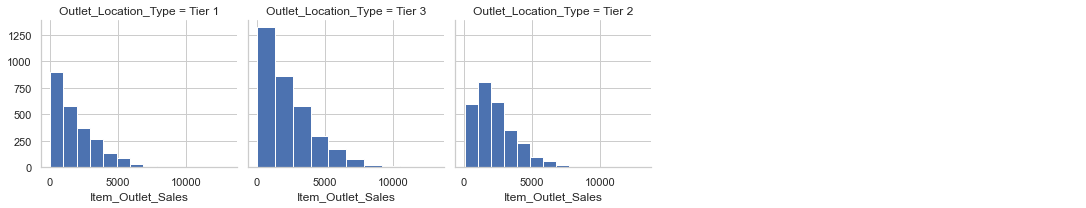

In [34]:
sns.FacetGrid(df, col='Outlet_Location_Type', size=3, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();
#Tier3 type of outlet location provides for the maximum sales and other two provides the least sales

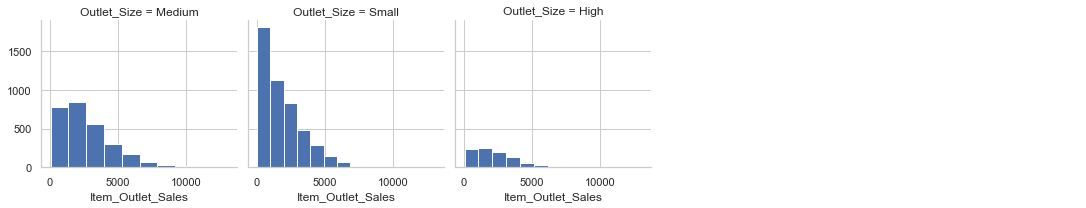

In [35]:
sns.FacetGrid(df, col='Outlet_Size', size=3, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();
#Small sized Outlets are providing the maximum sales whereas large sized outlets 
# are contributing the least

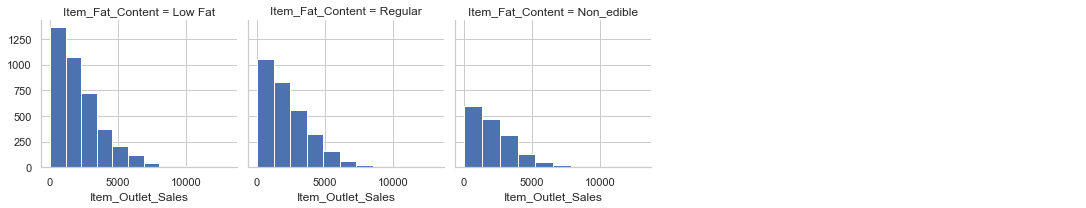

In [36]:
sns.FacetGrid(df, col='Item_Fat_Content', size=3, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();
# people are prefering items with lowest fat content the most 

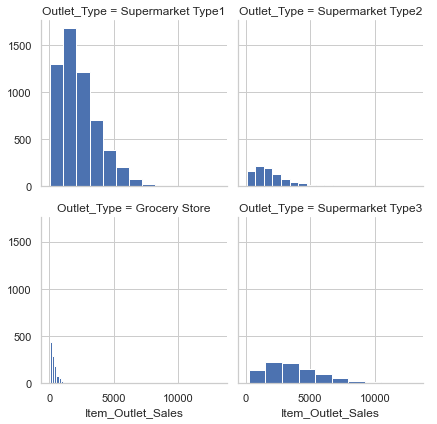

In [37]:
sns.FacetGrid(df, col='Outlet_Type', size=3, col_wrap=2) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();
#Maximum of the high sales margin is from Supermarket Type1
#Grocery store has the least sales

In [38]:
#Label Encoding all the columns with text entries and dropping Item_identifier  
le=LabelEncoder()
list=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_combined',
      'Outlet_Size']
for i in list:
    le.fit(df[i])
    df[i]=le.transform(df[i])
df_new=df.drop(columns='Item_Identifier')  # frequency encoding
df_new= pd.get_dummies(df_new,columns=['Outlet_Identifier'])
df_new.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_combined,years_old,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0,0.016047,249.8092,1,0,1,3735.1380,1,14,0,0,0,0,0,0,0,0,0,1
1,5.92,2,0.019278,48.2692,1,2,2,443.4228,0,4,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016760,141.6180,1,0,1,2097.2700,1,14,0,0,0,0,0,0,0,0,0,1
3,19.20,2,0.017834,182.0950,2,2,0,732.3800,1,15,1,0,0,0,0,0,0,0,0,0
4,8.93,1,0.009780,53.8614,0,2,1,994.7052,2,26,0,1,0,0,0,0,0,0,0,0


In [39]:
# explanatory code
# df.corr()
# sns.heatmap(df.corr())

In [40]:
df_new.iloc[:8523,:]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_combined,years_old,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,0,0.016047,249.8092,1,0,1,3735.1380,1,14,0,0,0,0,0,0,0,0,0,1
1,5.920,2,0.019278,48.2692,1,2,2,443.4228,0,4,0,0,0,1,0,0,0,0,0,0
2,17.500,0,0.016760,141.6180,1,0,1,2097.2700,1,14,0,0,0,0,0,0,0,0,0,1
3,19.200,2,0.017834,182.0950,2,2,0,732.3800,1,15,1,0,0,0,0,0,0,0,0,0
4,8.930,1,0.009780,53.8614,0,2,1,994.7052,2,26,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,0,2,1,2778.3834,1,26,0,1,0,0,0,0,0,0,0,0
8519,8.380,2,0.046982,108.1570,2,1,1,549.2850,1,11,0,0,0,0,0,0,0,1,0,0
8520,10.600,1,0.035186,85.1224,2,1,1,1193.1136,2,9,0,0,0,0,0,0,1,0,0,0
8521,7.210,2,0.145221,103.1332,1,2,2,1845.5976,1,4,0,0,0,1,0,0,0,0,0,0


In [41]:
#Separating test and train set
df_new_train=df_new.iloc[:8523,:]

df_new_test=df_new.iloc[8523:,:]

df_new_test=df_new_test.drop(columns=['Item_Outlet_Sales'])

In [42]:
Y_train=df_new_train['Item_Outlet_Sales']

df_train_test= df_new_train.drop(columns=['Item_Outlet_Sales'])

In [43]:
df_train_test.shape

(8523, 19)

In [44]:
df_train_test.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Type_combined', 'years_old', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049'],
      dtype='object')

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet 
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import QuantileRegressor
#### To Be applied after we cover these Algorithms.

# from sklearn.ensemble import RandomForestRegressor 
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.ensemble import BaggingRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.neural_network import MLPRegressor
# from xgboost import XGBRegressor
# import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [46]:
models = [('lr',LinearRegression()),
          ('sgd',SGDRegressor()),
          ('lasso',Lasso()),
          ('ridge',Ridge()),
          ('en',ElasticNet()),
          ('huber',HuberRegressor()),
          ('ransac',RANSACRegressor()),
          ('theilSen',TheilSenRegressor())
         ]

In [47]:
import sklearn
sklearn.metrics.get_scorer_names()

# For evaluating multiple scores, use sklearn.model_selection.cross_validate instead. ['r2'] was passed.

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [48]:
#Making function for making best 2 models for further hyperparameter tuning
#  https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
def basic_model_selection(x,y,cross_folds,model):
    scores=[]
    names = []
    for i , j in model:
        cv_scores = cross_val_score(j, x, y,cv=cross_folds,n_jobs=5)
        scores.append(cv_scores)
        names.append(i)
    for k in range(len(scores)):
        print(names[k],scores[k].mean())

In [49]:
basic_model_selection(df_train_test,Y_train,4,models)

lr 0.5600167514366816
sgd -3.0237125539148104e+18
lasso 0.5600380234974154
ridge 0.5600211200777784
en 0.4778293365405345
huber 0.5539649597942178
ransac 0.46157306546061017
theilSen 0.5509865240003207


In [50]:
# N Mse score
basic_model_selection(df_train_test,Y_train,4,models)

lr 0.5600167514366816
sgd -3.23554479335913e+19
lasso 0.5600380234974154
ridge 0.5600211200777784
en 0.4778293365405345
huber 0.5539649597942178
ransac 0.4787882144714091
theilSen 0.5502871737920951


In [51]:
# N Mae score
basic_model_selection(df_train_test,Y_train,4,models)

lr 0.5600167514366816
sgd -8.467492900970033e+18
lasso 0.5600380234974154
ridge 0.5600211200777784
en 0.4778293365405345
huber 0.5539649597942178
ransac 0.4617413622736879
theilSen 0.5512446508665391


In [52]:
# R2 score
basic_model_selection(df_train_test,Y_train,4,models)

lr 0.5600167514366816
sgd -1.0277881369688498e+19
lasso 0.5600380234974154
ridge 0.5600211200777784
en 0.4778293365405345
huber 0.5539649597942178
ransac 0.3825818393068324
theilSen 0.5504851773221531


# Standardization of the model before training

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

standardized=scaler.fit_transform(df_train_test)
column_names = df_train_test.columns
df_standardized = pd.DataFrame(data=standardized,columns=column_names)
df_standardized.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_combined,years_old,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,-0.769246,-0.997813,-1.081039,1.747454,-0.664080,-1.369334,-0.252658,-0.179795,-0.139541,-0.263920,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,2.857362
1,-1.496813,1.236942,-1.016230,-1.489023,-0.664080,1.091569,1.002972,-2.095286,-1.334103,-0.263920,-0.350395,-0.349128,2.860816,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973
2,0.995858,-0.997813,-1.066741,0.010040,-0.664080,-1.369334,-0.252658,-0.179795,-0.139541,-0.263920,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,2.857362
3,1.361794,1.236942,-1.045193,0.660050,0.799954,1.091569,-1.508289,-0.179795,-0.020085,3.789031,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973
4,-0.848890,0.119565,-1.206757,-1.399220,-2.128115,1.091569,-0.252658,1.735696,1.293934,-0.263920,2.853918,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973


In [54]:
basic_model_selection(df_standardized,Y_train,4,models)

lr 0.5596423399412482
sgd 0.5587144652784458
lasso 0.5600954106586716
ridge 0.5600174793091026
en 0.5116678074172953
huber 0.5540855379256
ransac 0.4566295008768121
theilSen 0.5242736501757879


# Using Robust Scaler

#### My dataset having outliers make it more prone to mistakes
* Robust Scaler handles the outliers as well
* It scales according to the quartile range

In [55]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

normalize = MinMaxScaler()
robust = RobustScaler(quantile_range = (0.1,0.8)) #range of inerquartile is one of the parameters

robust_stan = robust.fit_transform(df_train_test)
robust_stan_normalize = normalize.fit_transform(robust_stan)

# also normalized the dataset using MinMaxScaler i.e has bought the data set between (0,1)
df_robust_normalize = pd.DataFrame(robust_stan_normalize,columns=column_names)
df_robust_normalize.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_combined,years_old,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0.282525,0.0,0.038399,0.927507,0.5,0.0,0.333333,0.5,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.081274,1.0,0.048346,0.072068,0.5,1.0,0.666667,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.770765,0.0,0.040593,0.468288,0.5,0.0,0.333333,0.5,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.871986,1.0,0.043901,0.640093,1.0,1.0,0.000000,0.5,0.458333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.260494,0.5,0.019104,0.095805,0.0,1.0,0.333333,1.0,0.916667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
basic_model_selection(df_robust_normalize,Y_train,4,models)

lr 0.5600807120780363
sgd 0.5599071522757164
lasso 0.5602359565219659
ridge 0.560024447390153
en 0.16451783452458144
huber 0.5540659349000969
ransac 0.41857811460138594
theilSen 0.5470347657133786


In [60]:
# Metrics Calculation
from sklearn.metrics import r2_score, mean_absolute_error ,mean_squared_error

import math
def root_mean_squared_error(y,y_pred):
    mse =np.square(np.subtract(y,y_pred)).mean()
    rmse = math.sqrt(mse)
    return rmse

# Best Model 
#### Comparing all models using RMSE score 

In [57]:
robust_test = robust.fit_transform(df_new_test)
robust_normalize_test = normalize.fit_transform(robust_test)
df_test_robust_normalize = pd.DataFrame(robust_normalize_test,columns=column_names)

## Linear Regression

In [58]:
model = LinearRegression()
# Defining my final model that I will use for prediction

In [59]:
model.fit(df_robust_normalize,Y_train)

LinearRegression()

In [61]:
model.intercept_ , model.coef_

(-4907991773321971.0,
 array([ 5.58926229e-01,  4.56752910e+01, -5.16607548e+01,  3.66303252e+03,
         1.01747310e+16, -8.61239758e+15,  1.45758184e+15, -4.98389230e+01,
         9.80926433e+14,  2.89606710e+15,  1.21353462e+16, -1.52814489e+15,
         7.46130264e+15, -6.24766563e+15,  5.99451559e+15, -1.65076070e+15,
        -1.73250457e+15, -6.24306303e+15, -1.07395368e+15]))

In [62]:
print("MAE Score for model is : ",mean_absolute_error(Y_train,model.predict(df_robust_normalize)))
print("MSE Score for model is : ",mean_squared_error(Y_train,model.predict(df_robust_normalize)))
print("RMSE Score for model is : ",root_mean_squared_error(Y_train,model.predict(df_robust_normalize)))
print("R2 Score for model is : ",r2_score(Y_train,model.predict(df_robust_normalize)))

MAE Score for model is :  835.9927097500881
MSE Score for model is :  1271277.8520971958
RMSE Score for model is :  1127.5095796032936
R2 Score for model is :  0.5634047063842056


In [117]:
def feature_imp(estimator):
    """
    This function gives the feature importance dataframe for a emsemble or tree based estimator/model.
    input:
        estimator
    returns:
        dataframe feature importance
    """
    if hasattr(estimator, 'feature_importances_'):
        importances_value = estimator.feature_importances_.tolist()
    else:
        return "feature_importances_ is not supported."
    
    if hasattr(estimator, 'feature_names_in_'):
        importances_name = estimator.feature_names_in_.tolist()
    else:
        return "feature_names_in_ is not supported."
    
    feature_importance_df = pd.DataFrame({'feature_name':importances_name,'feature_columns':importances_value})
    feature_importance_df.sort_values(by='feature_columns',ascending=False,inplace=True)
    feature_importance_df = feature_importance_df.reset_index(drop=True)
    return feature_importance_df

## Decison Tree Regressor

In [66]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
model_dtree = DecisionTreeRegressor()

In [68]:
model_dtree.fit(df_robust_normalize,Y_train)

DecisionTreeRegressor()

In [69]:
print("MAE Score for model_dtree is : ",mean_absolute_error(Y_train,model_dtree.predict(df_robust_normalize)))
print("MSE Score for model_dtree is : ",mean_squared_error(Y_train,model_dtree.predict(df_robust_normalize)))
print("RMSE Score for model_dtree is : ",root_mean_squared_error(Y_train,model_dtree.predict(df_robust_normalize)))
print("R2 Score for model_dtree is : ",r2_score(Y_train,model_dtree.predict(df_robust_normalize)))

MAE Score for model_dtree is :  8.003297270089125e-17
MSE Score for model_dtree is :  1.81973911596495e-29
RMSE Score for model_dtree is :  4.265840029777195e-15
R2 Score for model_dtree is :  1.0


In [118]:
feature_imp(model_dtree)

,feature_name,feature_columns
0,Item_MRP,0.449833
1,Outlet_Type,0.199010
2,Item_Visibility,0.117299
3,Item_Weight,0.077999
4,Outlet_Identifier_OUT027,0.074645
5,years_old,0.016486
6,Item_Fat_Content,0.013626
7,Item_Type_combined,0.012546
8,Outlet_Size,0.006647
9,Outlet_Location_Type,0.006405


## Random Forest Regressor

In [142]:
from sklearn.ensemble import RandomForestRegressor

In [143]:
model_rf = RandomForestRegressor(bootstrap=True,oob_score=True)

In [144]:
model_rf.fit(df_robust_normalize,Y_train)

RandomForestRegressor(oob_score=True)

In [145]:
print("MAE Score for model_rf is : ",mean_absolute_error(Y_train,model_rf.predict(df_robust_normalize)))
print("MSE Score for model_rf is : ",mean_squared_error(Y_train,model_rf.predict(df_robust_normalize)))
print("RMSE Score for model_rf is : ",root_mean_squared_error(Y_train,model_rf.predict(df_robust_normalize)))
print("R2 Score for model_rf is : ",r2_score(Y_train,model_rf.predict(df_robust_normalize)))

MAE Score for model_rf is :  293.3787447560718
MSE Score for model_rf is :  178645.1261542398
RMSE Score for model_rf is :  422.6643185250442
R2 Score for model_rf is :  0.9386478564244052


In [146]:
model_rf.oob_score_

0.5562248159334365

In [147]:
feature_imp(model_rf)

,feature_name,feature_columns
0,Item_MRP,0.448494
1,Outlet_Type,0.220474
2,Item_Visibility,0.113074
3,Item_Weight,0.084707
4,years_old,0.043622
5,Outlet_Identifier_OUT027,0.022725
6,Item_Fat_Content,0.014557
7,Item_Type_combined,0.012303
8,Outlet_Location_Type,0.006400
9,Outlet_Size,0.006123


In [121]:
from sklearn.ensemble import ExtraTreesRegressor

In [130]:
model_etr = ExtraTreesRegressor(bootstrap=True, oob_score=True)

In [131]:
model_etr.fit(df_robust_normalize,Y_train)

ExtraTreesRegressor(bootstrap=True, oob_score=True)

In [132]:
print("MAE Score for model_etr is : ",mean_absolute_error(Y_train,model_etr.predict(df_robust_normalize)))
print("MSE Score for model_etr is : ",mean_squared_error(Y_train,model_etr.predict(df_robust_normalize)))
print("RMSE Score for model_etr is : ",root_mean_squared_error(Y_train,model_etr.predict(df_robust_normalize)))
print("R2 Score for model_etr is : ",r2_score(Y_train,model_etr.predict(df_robust_normalize)))

MAE Score for model_etr is :  291.3753632582423
MSE Score for model_etr is :  178164.6227148539
RMSE Score for model_etr is :  422.09551373457373
R2 Score for model_etr is :  0.9388128758494317


In [135]:
model_etr.oob_score_

0.5570688045141163

In [125]:
feature_imp(model_etr)

,feature_name,feature_columns
0,Item_MRP,0.442990
1,Outlet_Type,0.163039
2,Item_Visibility,0.100207
3,Item_Weight,0.098229
4,Outlet_Identifier_OUT027,0.066884
5,Item_Fat_Content,0.022952
6,Item_Type_combined,0.021684
7,Outlet_Identifier_OUT010,0.017877
8,Outlet_Identifier_OUT019,0.012334
9,years_old,0.008418


## Adaboost Regressor

In [148]:
from sklearn.ensemble import AdaBoostRegressor

In [149]:
model_ada = AdaBoostRegressor()

In [150]:
model_ada.fit(df_robust_normalize,Y_train)

AdaBoostRegressor()

In [151]:
print("MAE Score for model_ada is : ",mean_absolute_error(Y_train,model_ada.predict(df_robust_normalize)))
print("MSE Score for model_ada is : ",mean_squared_error(Y_train,model_ada.predict(df_robust_normalize)))
print("RMSE Score for model_ada is : ",root_mean_squared_error(Y_train,model_ada.predict(df_robust_normalize)))
print("R2 Score for model_ada is : ",r2_score(Y_train,model_ada.predict(df_robust_normalize)))

MAE Score for model_ada is :  1008.1721683393729
MSE Score for model_ada is :  1562760.785194119
RMSE Score for model_ada is :  1250.1043097254403
R2 Score for model_ada is :  0.4633006445148775


In [152]:
feature_imp(model_ada)

,feature_name,feature_columns
0,Item_MRP,0.505990
1,Outlet_Type,0.161767
2,Item_Visibility,0.118398
3,Outlet_Identifier_OUT027,0.070606
4,Item_Weight,0.067079
5,years_old,0.036299
6,Outlet_Location_Type,0.014783
7,Outlet_Identifier_OUT017,0.011689
8,Outlet_Size,0.006707
9,Item_Fat_Content,0.005898


In [153]:
from sklearn.ensemble import GradientBoostingRegressor

In [154]:
model_gbr = GradientBoostingRegressor()

In [155]:
model_gbr.fit(df_robust_normalize,Y_train)

GradientBoostingRegressor()

In [156]:
print("MAE Score for model_gbr is : ",mean_absolute_error(Y_train,model_gbr.predict(df_robust_normalize)))
print("MSE Score for model_gbr is : ",mean_squared_error(Y_train,model_gbr.predict(df_robust_normalize)))
print("RMSE Score for model_gbr is : ",root_mean_squared_error(Y_train,model_gbr.predict(df_robust_normalize)))
print("R2 Score for model_gbr is : ",r2_score(Y_train,model_gbr.predict(df_robust_normalize)))

MAE Score for model_gbr is :  730.0872430930981
MSE Score for model_gbr is :  1074007.1393139674
RMSE Score for model_gbr is :  1036.3431571221772
R2 Score for model_gbr is :  0.6311534401699066


In [158]:
! pip install catboost

In [160]:
from catboost import  CatBoostRegressor

In [161]:
model_cat = CatBoostRegressor()

In [162]:
model_cat.fit(df_robust_normalize,Y_train)

Learning rate set to 0.05744
0:	learn: 1655.3375801	total: 150ms	remaining: 2m 30s
1:	learn: 1607.1407332	total: 153ms	remaining: 1m 16s
2:	learn: 1560.1787888	total: 155ms	remaining: 51.5s
3:	learn: 1516.1679653	total: 158ms	remaining: 39.4s
4:	learn: 1476.3310987	total: 161ms	remaining: 32s
5:	learn: 1440.7986134	total: 163ms	remaining: 27s
6:	learn: 1408.6471154	total: 166ms	remaining: 23.5s
7:	learn: 1379.2618148	total: 168ms	remaining: 20.8s
8:	learn: 1350.7032322	total: 170ms	remaining: 18.7s
9:	learn: 1325.9055375	total: 172ms	remaining: 17.1s
10:	learn: 1302.0682019	total: 175ms	remaining: 15.7s
11:	learn: 1280.5094769	total: 178ms	remaining: 14.6s
12:	learn: 1260.8104010	total: 182ms	remaining: 13.8s
13:	learn: 1243.7330755	total: 184ms	remaining: 13s
14:	learn: 1227.6194017	total: 187ms	remaining: 12.3s
15:	learn: 1213.1059245	total: 190ms	remaining: 11.7s
16:	learn: 1199.8625774	total: 194ms	remaining: 11.2s
17:	learn: 1187.3388089	total: 205ms	remaining: 11.2s
18:	learn: 11

159:	learn: 1034.9232858	total: 707ms	remaining: 3.71s
160:	learn: 1034.4941952	total: 710ms	remaining: 3.7s
161:	learn: 1034.2871817	total: 713ms	remaining: 3.69s
162:	learn: 1033.9982929	total: 716ms	remaining: 3.68s
163:	learn: 1033.8199312	total: 720ms	remaining: 3.67s
164:	learn: 1033.5443582	total: 723ms	remaining: 3.66s
165:	learn: 1033.1619858	total: 726ms	remaining: 3.65s
166:	learn: 1032.8435082	total: 729ms	remaining: 3.64s
167:	learn: 1032.6047493	total: 732ms	remaining: 3.63s
168:	learn: 1032.4493317	total: 735ms	remaining: 3.62s
169:	learn: 1032.0184716	total: 739ms	remaining: 3.61s
170:	learn: 1031.6959316	total: 742ms	remaining: 3.6s
171:	learn: 1031.4025936	total: 746ms	remaining: 3.59s
172:	learn: 1031.1889439	total: 750ms	remaining: 3.58s
173:	learn: 1030.3672622	total: 753ms	remaining: 3.57s
174:	learn: 1030.0433087	total: 756ms	remaining: 3.56s
175:	learn: 1029.7077771	total: 760ms	remaining: 3.56s
176:	learn: 1029.5179110	total: 763ms	remaining: 3.55s
177:	learn: 

326:	learn: 984.6710966	total: 1.58s	remaining: 3.26s
327:	learn: 984.4033441	total: 1.59s	remaining: 3.26s
328:	learn: 984.1252613	total: 1.59s	remaining: 3.25s
329:	learn: 983.9408797	total: 1.6s	remaining: 3.24s
330:	learn: 983.6821280	total: 1.6s	remaining: 3.23s
331:	learn: 983.4592389	total: 1.6s	remaining: 3.23s
332:	learn: 983.3825107	total: 1.61s	remaining: 3.22s
333:	learn: 983.0281994	total: 1.61s	remaining: 3.22s
334:	learn: 982.8830361	total: 1.62s	remaining: 3.21s
335:	learn: 982.5133264	total: 1.62s	remaining: 3.2s
336:	learn: 982.2274173	total: 1.62s	remaining: 3.19s
337:	learn: 982.0308953	total: 1.63s	remaining: 3.19s
338:	learn: 981.7891585	total: 1.63s	remaining: 3.18s
339:	learn: 981.5806388	total: 1.63s	remaining: 3.17s
340:	learn: 981.3145600	total: 1.64s	remaining: 3.17s
341:	learn: 981.0128499	total: 1.64s	remaining: 3.16s
342:	learn: 980.8931324	total: 1.64s	remaining: 3.15s
343:	learn: 980.7510711	total: 1.65s	remaining: 3.14s
344:	learn: 980.4093660	total: 1

483:	learn: 950.0943613	total: 2.11s	remaining: 2.25s
484:	learn: 949.7364178	total: 2.11s	remaining: 2.25s
485:	learn: 949.5605500	total: 2.12s	remaining: 2.24s
486:	learn: 949.4632788	total: 2.12s	remaining: 2.23s
487:	learn: 949.4135828	total: 2.12s	remaining: 2.23s
488:	learn: 949.3354010	total: 2.13s	remaining: 2.22s
489:	learn: 949.2027586	total: 2.13s	remaining: 2.22s
490:	learn: 948.9806491	total: 2.13s	remaining: 2.21s
491:	learn: 948.8191861	total: 2.14s	remaining: 2.21s
492:	learn: 948.5932225	total: 2.14s	remaining: 2.2s
493:	learn: 948.4124848	total: 2.14s	remaining: 2.19s
494:	learn: 948.1960339	total: 2.15s	remaining: 2.19s
495:	learn: 947.9871968	total: 2.15s	remaining: 2.18s
496:	learn: 947.9278287	total: 2.15s	remaining: 2.18s
497:	learn: 947.7472464	total: 2.15s	remaining: 2.17s
498:	learn: 947.5654717	total: 2.16s	remaining: 2.17s
499:	learn: 947.4826597	total: 2.16s	remaining: 2.16s
500:	learn: 947.3209671	total: 2.16s	remaining: 2.16s
501:	learn: 947.2326577	total

675:	learn: 916.2666198	total: 2.82s	remaining: 1.35s
676:	learn: 916.1834930	total: 2.82s	remaining: 1.35s
677:	learn: 916.0839694	total: 2.83s	remaining: 1.34s
678:	learn: 915.9938379	total: 2.83s	remaining: 1.34s
679:	learn: 915.8272528	total: 2.84s	remaining: 1.33s
680:	learn: 915.6951486	total: 2.84s	remaining: 1.33s
681:	learn: 915.4123443	total: 2.85s	remaining: 1.33s
682:	learn: 915.1529900	total: 2.85s	remaining: 1.32s
683:	learn: 915.0211637	total: 2.86s	remaining: 1.32s
684:	learn: 914.7652465	total: 2.86s	remaining: 1.31s
685:	learn: 914.5975249	total: 2.87s	remaining: 1.31s
686:	learn: 914.3388609	total: 2.87s	remaining: 1.31s
687:	learn: 914.2725227	total: 2.87s	remaining: 1.3s
688:	learn: 914.1180312	total: 2.88s	remaining: 1.3s
689:	learn: 913.9595743	total: 2.88s	remaining: 1.29s
690:	learn: 913.8556901	total: 2.89s	remaining: 1.29s
691:	learn: 913.7582247	total: 2.9s	remaining: 1.29s
692:	learn: 913.5000684	total: 2.9s	remaining: 1.28s
693:	learn: 913.3784261	total: 2

832:	learn: 890.7200471	total: 3.55s	remaining: 711ms
833:	learn: 890.5798552	total: 3.55s	remaining: 707ms
834:	learn: 890.3969843	total: 3.56s	remaining: 704ms
835:	learn: 890.2439766	total: 3.57s	remaining: 701ms
836:	learn: 889.9845016	total: 3.58s	remaining: 697ms
837:	learn: 889.8360352	total: 3.58s	remaining: 693ms
838:	learn: 889.7275722	total: 3.59s	remaining: 689ms
839:	learn: 889.6510995	total: 3.6s	remaining: 686ms
840:	learn: 889.4994218	total: 3.6s	remaining: 682ms
841:	learn: 889.3948936	total: 3.61s	remaining: 678ms
842:	learn: 889.3221879	total: 3.62s	remaining: 674ms
843:	learn: 889.0878498	total: 3.62s	remaining: 670ms
844:	learn: 888.8867780	total: 3.63s	remaining: 666ms
845:	learn: 888.7656925	total: 3.64s	remaining: 663ms
846:	learn: 888.5175684	total: 3.65s	remaining: 659ms
847:	learn: 888.3428135	total: 3.65s	remaining: 655ms
848:	learn: 888.1441450	total: 3.66s	remaining: 651ms
849:	learn: 887.9989588	total: 3.66s	remaining: 647ms
850:	learn: 887.8309301	total:

In [163]:
print("MAE Score for model_cat is : ",mean_absolute_error(Y_train,model_cat.predict(df_robust_normalize)))
print("MSE Score for model_cat is : ",mean_squared_error(Y_train,model_cat.predict(df_robust_normalize)))
print("RMSE Score for model_cat is : ",root_mean_squared_error(Y_train,model_cat.predict(df_robust_normalize)))
print("R2 Score for model_cat is : ",r2_score(Y_train,model_cat.predict(df_robust_normalize)))

MAE Score for model_cat is :  625.9090337256961
MSE Score for model_cat is :  750466.3067200301
RMSE Score for model_cat is :  866.2945842610521
R2 Score for model_cat is :  0.7422671550592372


In [164]:
! pip install lightgbm

In [168]:
from lightgbm import LGBMRegressor

In [169]:
model_lgbm = LGBMRegressor()

In [170]:
model_lgbm.fit(df_robust_normalize,Y_train)

LGBMRegressor()

In [171]:
print("MAE Score for model_lgbm is : ",mean_absolute_error(Y_train,model_lgbm.predict(df_robust_normalize)))
print("MSE Score for model_lgbm is : ",mean_squared_error(Y_train,model_lgbm.predict(df_robust_normalize)))
print("RMSE Score for model_lgbm is : ",root_mean_squared_error(Y_train,model_lgbm.predict(df_robust_normalize)))
print("R2 Score for model_lgbm is : ",r2_score(Y_train,model_lgbm.predict(df_robust_normalize)))

MAE Score for model_lgbm is :  654.6923039130734
MSE Score for model_lgbm is :  840501.8796373843
RMSE Score for model_lgbm is :  916.7888958955513
R2 Score for model_lgbm is :  0.7113462141108275


## Xgboost [Xtreme Gradient Boosting.]

In [173]:
! pip install xgboost

In [175]:
from xgboost import  XGBRegressor

In [176]:
model_xgb = XGBRegressor()

In [177]:
model_xgb.fit(df_robust_normalize,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [178]:
print("MAE Score for model_xgb is : ",mean_absolute_error(Y_train,model_xgb.predict(df_robust_normalize)))
print("MSE Score for model_xgb is : ",mean_squared_error(Y_train,model_xgb.predict(df_robust_normalize)))
print("RMSE Score for model_xgb is : ",root_mean_squared_error(Y_train,model_xgb.predict(df_robust_normalize)))
print("R2 Score for model_xgb is : ",r2_score(Y_train,model_xgb.predict(df_robust_normalize)))

MAE Score for model_xgb is :  516.4969162490946
MSE Score for model_xgb is :  514099.00673181145
RMSE Score for model_xgb is :  717.0069781611683
R2 Score for model_xgb is :  0.8234428402717875


In [63]:
final_prediction=model.predict(df_test_robust_normalize) #Predicting the outlet sales

In [64]:
#the prediction is in the form of numpy array 
# Converting into Dataframe 
df_final_prediction = pd.DataFrame(final_prediction,columns=['Item_Outlet_Sales'])

In [65]:
df_final_prediction.head()

,Item_Outlet_Sales
0,1831.0
1,1549.0
2,1892.0
3,2565.0
4,5189.0


# Saving the final model using Joblib

In [96]:
import joblib
filename = 'linear_regression.sav' # Name of the model 
joblib.dump(model, filename) # it is saved in your current working directory

['linear_regression.sav']

In [97]:
# This command loads the model once again
load_model = joblib.load(filename)

In [98]:
float_formatter = "{:.2f}".format

In [100]:
load_model.predict(np.array(df_robust_normalize.iloc[0,:]).reshape(1, -1))

array([4042.])

In [101]:
load_model.predict(np.array(df_robust_normalize.iloc[0:5,:]))

array([4042.,  604., 2360., 1023.,  928.])

In [99]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_combined,years_old
0,FDA15,9.30,0,0.016047,249.8092,OUT049,1,0,1,3735.1380,1,14
1,DRC01,5.92,2,0.019278,48.2692,OUT018,1,2,2,443.4228,0,4
2,FDN15,17.50,0,0.016760,141.6180,OUT049,1,0,1,2097.2700,1,14
3,FDX07,19.20,2,0.017834,182.0950,OUT010,2,2,0,732.3800,1,15
4,NCD19,8.93,1,0.009780,53.8614,OUT013,0,2,1,994.7052,2,26
